###### <!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/LOGO_CDFI.png">

*Este notebook es parte del curso de Ciencia de Datos  [Ciencia de Datos](http://bit.ly/CD-20a) impartido por el profesor Enrique Camacho de la Universidad Autónoma de Yucatán.*

Clase 16 - Ejemplo de proyecto real - 29 Abril 2020 

<center><h1 style="font-size:2em;color:RED">Enfermedades del corazón </h1></center>

# Proyecto de Machine Learning

	
En las siguientes clases se realizará un proyecto de ejemplo de principio a fin, pretendiendo ser un científico de datos recientemente contratado en una empresa de bienes raíces. Estos son los pasos principales que deberá seguir:

1. Mira el panorama general y entienda el problema.
* Obtenga los datos.
* Descubra y visualice los datos para obtener información.
* Prepare los datos para los algoritmos de Machine Learning.
* Seleccione un modelo y realice el entrenamiento (train).
* Afina(fine tune) el modelo.
* Presente su solución.
* Inicie (Launch), monitoree y mantenga su sistema

[Documento extendido](https://bit.ly/2Sqtfhl)


## 1. Mira el panorama general y entienda el problema.

<br><br><center><h1 style="font-size:2em;color:#2467C0">Caso de estudio: Enfermedades del corazón </h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
    
    
<td><img src="figuras/corazon.jpg" align="middle" style="width:550px;"/></td>
<td>
    
Las enfermedades cardiovasculares representan una amenaza real para los sistemas de salud de muchos países, debido a que se han convertido en uno de los diagnósticos que cobra un número significativo de vidas en el mundo entero. De acuerdo a los datos emitidos por la Organización Mundial de la Salud (OMS) las enfermedades cardiovasculares son una causa importante de muertes, se estima que 9.4 millones y medio de muertes, es decir, el 16,5% de las muertes anuales, son atribuibles a la hipertensión únicamente. Esto incluye el 51% de las muertes por accidentes cardiovasculares cerebrales (AVC) y el 45% de las muertes por cardiopatía coronaria. De acuerdo a lo anteriormente mencionado, el análisis de este tipo de enfermedades se ha convertido en un factor común de investigación, la aplicación de sistemas informáticos inteligentes brinda la posibilidad de identificar de forma anticipada los pacientes que puedan padecer dicha enfermedad.

    
<br>
</td>
</tr>
</table>

**Problema**

A través del análisis de los datos se identificarán factores de riesgos que están asociados con enfermedades cardiovasculares como la edad, la presión arterial, el hábito de fumar, altos niveles de colesterol, diabetes, entre otras variables con la finalidad de ayudar al profesional de la salud a identificar si en un paciente existe riesgo de enfermedad cardiovascular.



## 2.  Obtenga los datos

Se utilizará un conjunto de datos provenientes de 4 diferentes hospitales que hacen referencia a enfermedades cardiovasculares a través del repositorio de Machine Learning UCI. El conjunto de datos cuenta con 14 atributos y 303
registros así:
1. Edad: en años
2. Sexo: masculino y femenino (tomando como valor numérico el 1 y 0 respectivamente).
3. Tipo dolor de pecho:
    * Valor1: Angina típica
    * Valor2: Angina atípica
    * Valor3: Otro dolor
    * Valor4: Asintomático
4. Presión arterial en reposo: En mmHgen la admisión al hospital.
5. Colesterol: mg/dl
6. Nivel de azúcar>120mg/dl: verdadero o falso (tomando como valor numérico el 1 y 0 respectivamente).
7. Resultado electrocardiograma:
    * Valor0: Normal
    * Valor1: Anomalías
    * Valor2: Hipertrofia ventricular
8. Frecuencia cardiaca máxima alcanzada.
9. Ejercicio de inducción de angina: sí o no (tomando como valor numérico el 1 y 0 respectivamente)
10. Depresión inducida.
11. Pendiente curva máxima del ejercicio.
12. Número de vasos mayores (0-3).
13. Thal (Trastorno sanguíneo llamado talasemia):
    * 3: Normal
    * 6: Defecto fijo
    * 7: Defecto reversible
14. Diagnóstico de enfermedad cardiaca (estado de enfermedad hagiográfica): menor 50% o mayor 50% (tomando como valor numérico el 0 y 1 respectivamente).

https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Datos: **datos/heart_disease.csv**

In [1]:
# Módulos importantes
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Cargamos el archivo 'datos/heart_disease.csv' en un dataframe
df = pd.read_csv('datos/heart_disease.csv')

## 3. Descubra y visualice los datos para obtener información.

In [3]:
# Mostrar los primeras filas
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Mostrar las columnas
df.columns.values

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype=object)

In [5]:
# Mostrar el número de filas y columnas
df.shape

(303, 14)

In [6]:
# Mostrar el tipo de variables
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

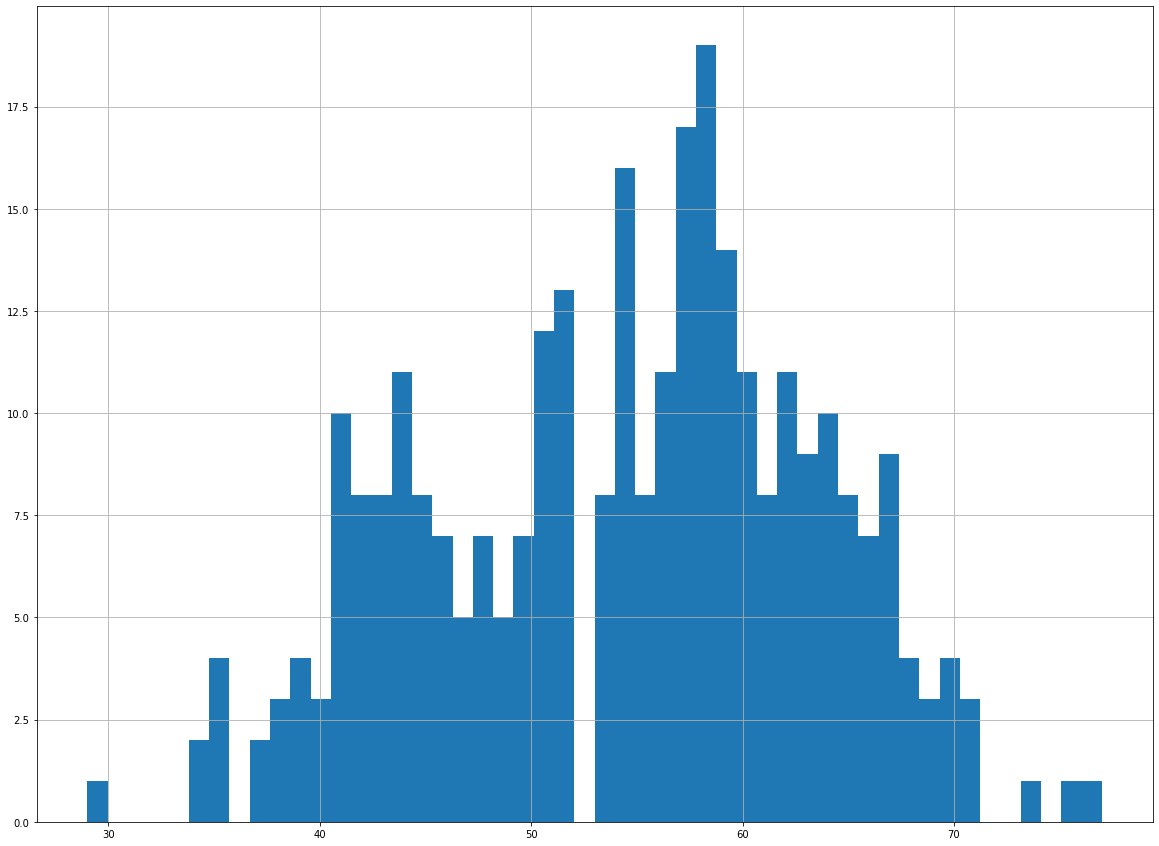

In [7]:
# Hacer un histograma de la edad
df['age'].hist(bins=50, figsize=(20,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1210ADC0>,
      dtype=object)

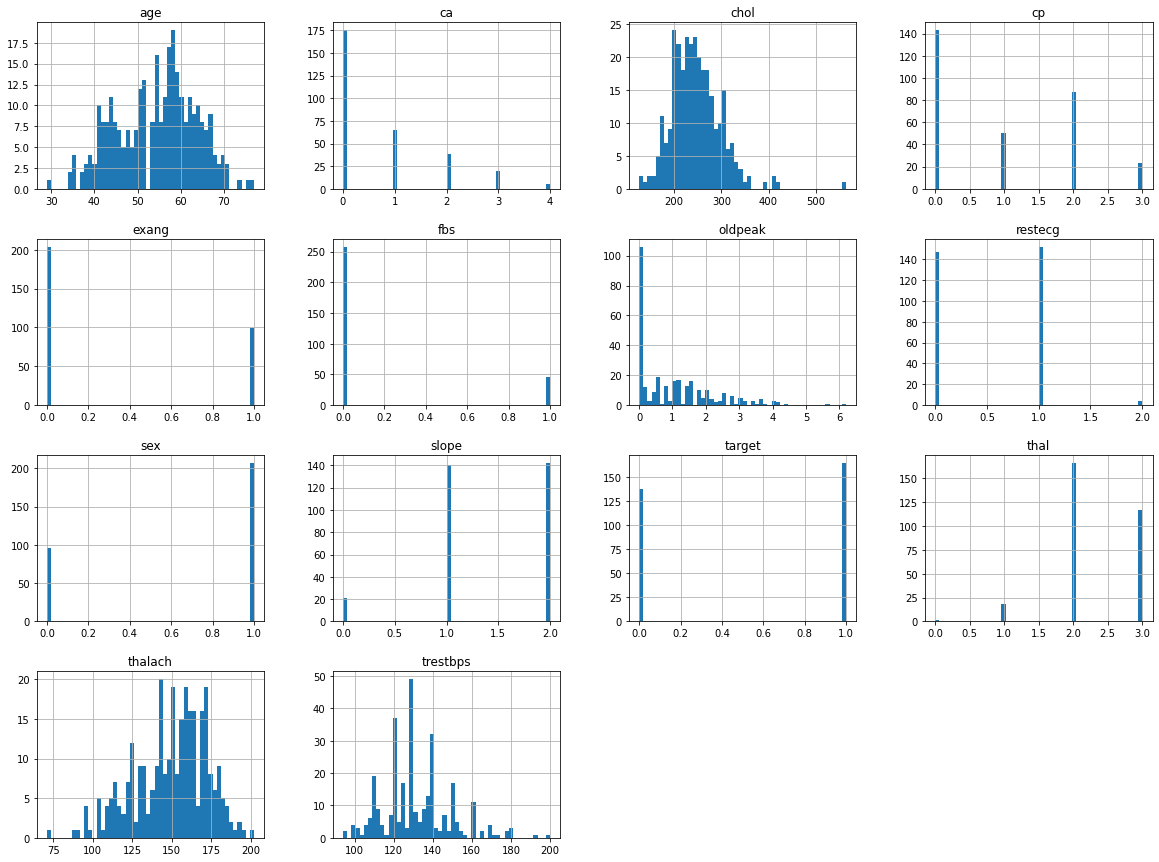

In [8]:
# Hacer un histograma de todas las variables numericas
df.hist(bins=50, figsize=(20,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12B8C4F0>,
      dtype=object)

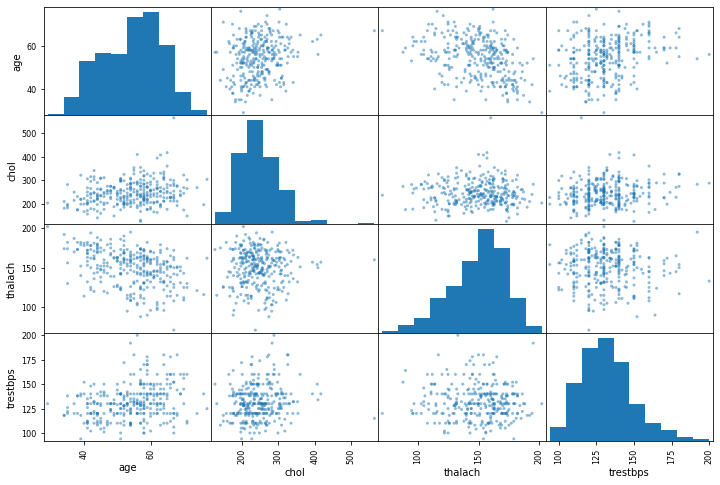

In [9]:
#Hacer diagramas de correlación
from pandas.plotting import scatter_matrix
atributos=['age','chol','thalach', 'trestbps']
scatter_matrix(df[atributos],figsize=(12,8))


###  Coeficiente de correlación de Pearson

<img  align="middle" style="width:850px;" src="figuras/pearson.png">

In [10]:
# Matriz correlación númerica
df[atributos].corr(method='pearson').round(2)

,age,chol,thalach,trestbps
age,1.00,0.21,-0.40,0.28
chol,0.21,1.00,-0.01,0.12
thalach,-0.40,-0.01,1.00,-0.05
trestbps,0.28,0.12,-0.05,1.00


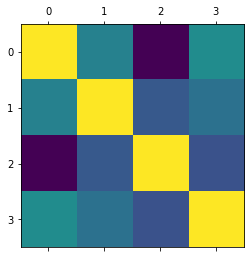

In [11]:
# Matriz correlación visual
plt.matshow(df[atributos].corr())
plt.show()

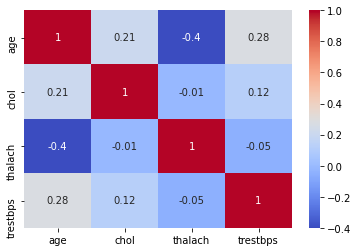

In [12]:
#Instalación de seaborn
#pip install seaborn
#https://matplotlib.org/tutorials/colors/colormaps.html

import seaborn as sn
corrMatrix=df[atributos].corr()
sn.heatmap( corrMatrix.round(2) , annot=True, cmap='coolwarm' )
plt.show()


## 4. Prepare los datos para los algoritmos de Machine Learning.

<img  align="middle" style="width:550px;" src="figuras/ml_diagrama3.jpg">

División general de los datos
* **X**: Datos sin el diagnostico es decir sin la columna "target"
* **y**: Datos con el diagnostico es decir con la columna "target"

Muestras de entrenamiento y prueba
* **X_train**: este será el grupo de entrenamiento
* **X_test**: este será el  grupo de prueba
* **y_train**: este será el target para el grupo de entrenamiento
* **y_test**: este será el target para el grupo de prueba


In [13]:
# Crear X (Quitar la columna o campo de "target")
X=df.drop('target',axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [14]:
# Crear y (Valor de de la columna "target")
y=df['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [15]:
# Dividir los datos para entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y )


In [16]:
# Revise  el tamaño de cada muestra
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((227, 13), (76, 13), (227,), (76,))

## 5A .  Seleccione un modelo y realice el entrenamiento (train).


<img  align="middle" style="width:750px;" src="figuras/imagesTree.jpg">



###  Árbol de decisión

In [17]:
## Módulos del Modelo: Arboles de decision 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [18]:
# modelo DecisionTreeClassifier
model = DecisionTreeClassifier( random_state=17, max_depth=5, 
                              min_samples_leaf=5)

In [19]:
# Ajuste del modelo
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=17, splitter='best')

In [20]:
# Predicción
y_pred = model.predict(X_test)
y_pred 

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1], dtype=int64)

In [21]:
# Prueba en y_test
y_test.values

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [22]:
# Score
np.equal(y_pred,y_test.values)

array([ True,  True, False,  True,  True,  True,  True, False, False,
       False, False,  True,  True,  True,  True, False,  True,  True,
       False,  True, False,  True, False,  True,  True,  True,  True,
        True,  True, False, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True, False,  True, False,
       False,  True,  True,  True])

In [23]:
model.score(X_test, y_test)

0.75

## 6A .  Afina(fine tune) el modelo.


In [24]:
# Ajuste de los parametros max_depth y min_samples_leaf

for j in range(1,8,2) :
    for i in range (1,8,2):
        print(f'Modelo con {i} max_depth, {j} min_samples_leaf')
        model = DecisionTreeClassifier( random_state=17, max_depth=i, 
                              min_samples_leaf=j)
        model.fit(X_train, y_train)
        print(f'Precisión:{ model.score(X_test,y_test) }')
        print('.....')


Modelo con 1 max_depth, 1 min_samples_leaf
Precisión:0.75
.....
Modelo con 3 max_depth, 1 min_samples_leaf
Precisión:0.75
.....
Modelo con 5 max_depth, 1 min_samples_leaf
Precisión:0.7894736842105263
.....
Modelo con 7 max_depth, 1 min_samples_leaf
Precisión:0.7763157894736842
.....
Modelo con 1 max_depth, 3 min_samples_leaf
Precisión:0.75
.....
Modelo con 3 max_depth, 3 min_samples_leaf
Precisión:0.75
.....
Modelo con 5 max_depth, 3 min_samples_leaf
Precisión:0.7763157894736842
.....
Modelo con 7 max_depth, 3 min_samples_leaf
Precisión:0.7763157894736842
.....
Modelo con 1 max_depth, 5 min_samples_leaf
Precisión:0.75
.....
Modelo con 3 max_depth, 5 min_samples_leaf
Precisión:0.75
.....
Modelo con 5 max_depth, 5 min_samples_leaf
Precisión:0.75
.....
Modelo con 7 max_depth, 5 min_samples_leaf
Precisión:0.75
.....
Modelo con 1 max_depth, 7 min_samples_leaf
Precisión:0.75
.....
Modelo con 3 max_depth, 7 min_samples_leaf
Precisión:0.75
.....
Modelo con 5 max_depth, 7 min_samples_leaf
Preci

## 5B .  Seleccione un modelo y realice el entrenamiento (train).


In [25]:
# Módulo RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [26]:
# Modelo
model = RandomForestClassifier (random_state=17,
                               max_depth=5,
                               n_estimators=10)

In [27]:
# Ajuste del modelado
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=17, verbose=0,
                       warm_start=False)

In [28]:
# Predicción
y_pred=model.predict(X_test)
y_pred


array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [29]:
# Comparación
np.equal(y_pred,y_test.values)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True])

In [30]:
# Score
model.score(X_test, y_test)

0.868421052631579

## 6B .  Afina(fine tune) el modelo.


In [31]:
# RandomForestClassifier(random_state=17,max_depth=5,n_estimators=i,)
for i in range (10,50,10):
    print(f'Modelo con n_estimators = {i}')
    model=RandomForestClassifier(random_state=17,
                                 max_depth=5,
                                 n_estimators=i)
    model.fit(X_train, y_train)
    print(f'Precisión: {model.score(X_test,y_test)}')
    print('...')


Modelo con n_estimators = 10
Precisión: 0.868421052631579
...
Modelo con n_estimators = 20
Precisión: 0.8026315789473685
...
Modelo con n_estimators = 30
Precisión: 0.8026315789473685
...
Modelo con n_estimators = 40
Precisión: 0.8157894736842105
...


In [32]:
#Tarea: RandomForestClassifier(random_state=17,max_depth=i,n_estimators=j)


## 7. Presente su solución

| Modelo o clasificador   |  Eficiencia | Parametros de ajuste  |
|---|---|---|
|  Decision Tree | 79 %  |    max_depth = 5,  min_samples_leaf = 3   |
|  Random Forest   | 83%  |     max_depth =5 ,   n_estimators =30   |
